In [1]:
import numpy as np
from keras.models import Sequential

In [2]:
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten

In [3]:
from keras.datasets import cifar10

In [4]:
(train_images, train_labels), (test_images, test_labels)= cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [5]:
train_images=train_images/255.0

In [6]:
test_images=test_images/255.0

In [7]:
labels=['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

In [8]:
def plott(i):
  plt.imshow(train_images[i])
  plt.title(labels[train_labels1[i]])

In [9]:
import matplotlib.pyplot as plt
train_labels1 = np.squeeze(train_labels)



In [10]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [11]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
train_labels1

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

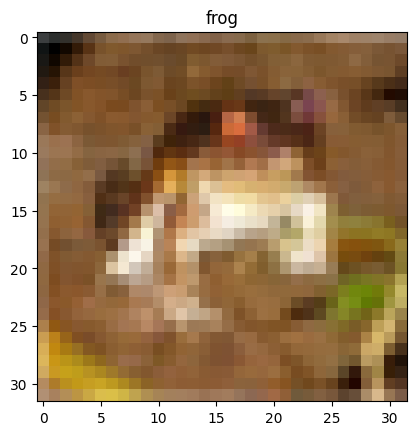

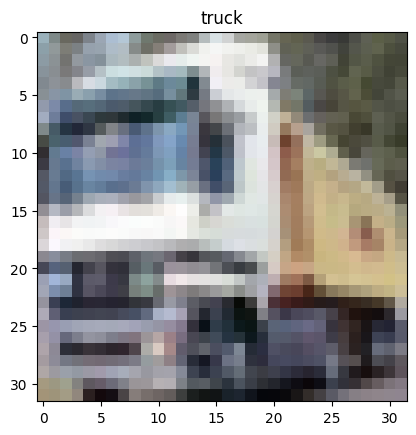

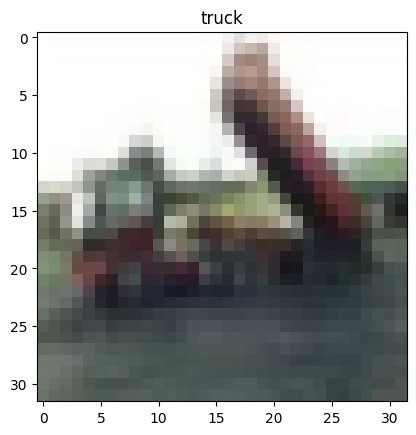

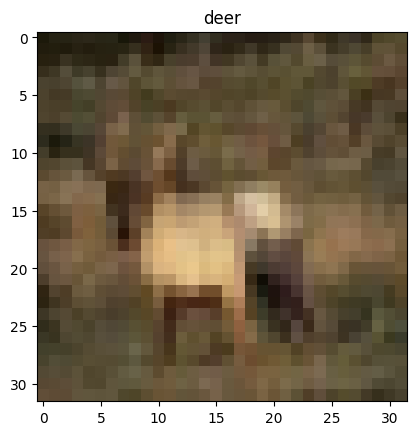

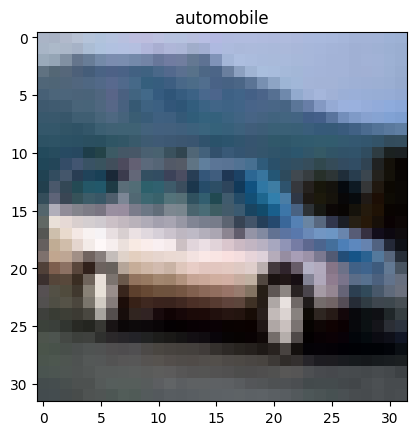

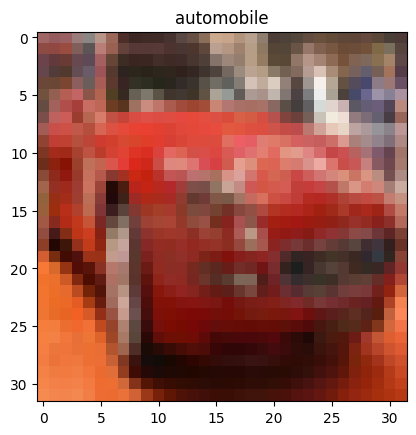

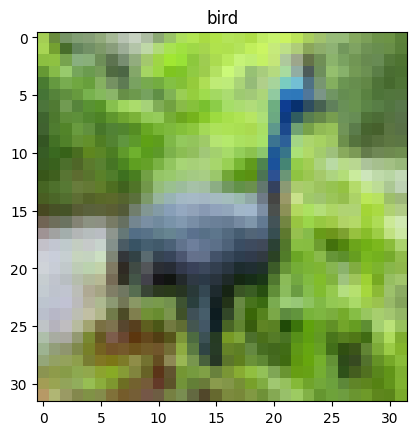

In [13]:
for i in range(7):
  plott(i)
  plt.show()

In [14]:
model1=Sequential()

model1.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model1.add(MaxPool2D(2,2))

model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPool2D(2,2))

model1.add(Flatten())

model1.add(Dense(64,activation='relu',))
model1.add(Dense(10))

In [15]:
from keras.losses import CategoricalCrossentropy
model1.compile(optimizer='adam',loss=CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 64)                7

In [17]:
from keras.utils import to_categorical
train_labels_en = to_categorical(train_labels,10)
test_labels_en = to_categorical(test_labels,10)

In [18]:
fit1=model1.fit(train_images,train_labels_en,epochs=20,validation_data=(test_images, test_labels_en))

Epoch 1/20
1563/1563 [==============================] - 25s 8ms/step - loss: 1.5372 - accuracy: 0.4443 - val_loss: 1.3070 - val_accuracy: 0.5365
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2059 - accuracy: 0.5743 - val_loss: 1.1451 - val_accuracy: 0.6014
Epoch 3/20
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0880 - accuracy: 0.6201 - val_loss: 1.1147 - val_accuracy: 0.6092
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0118 - accuracy: 0.6470 - val_loss: 1.0162 - val_accuracy: 0.6465
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9570 - accuracy: 0.6652 - val_loss: 1.0012 - val_accuracy: 0.6488
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9183 - accuracy: 0.6796 - val_loss: 0.9790 - val_accuracy: 0.6577
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8801 - accuracy: 0.6914 - val_loss: 0.9902 - val_accuracy

In [19]:
model2=Sequential()

model2.add(Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.2))

model2.add(Conv2D(32,(3,3),activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Dropout(0.25))

model2.add(Flatten())

model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 32)         

In [21]:
model2.compile(optimizer='adam',loss=CategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [22]:
fit2=model2.fit(train_images,train_labels_en,epochs=40,validation_data=(test_images, test_labels_en))

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5561: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 9s 5ms/step - loss: 1.5498 - accuracy: 0.4387 - val_loss: 1.3004 - val_accuracy: 0.5409
Epoch 2/40
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2065 - accuracy: 0.5740 - val_loss: 1.1358 - val_accuracy: 0.6156
Epoch 3/40
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0940 - accuracy: 0.6158 - val_loss: 1.0433 - val_accuracy: 0.6391
Epoch 4/40
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0335 - accuracy: 0.6382 - val_loss: 0.9427 - val_accuracy: 0.6738
Epoch 5/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9868 - accuracy: 0.6530 - val_loss: 0.9198 - val_accuracy: 0.6822
Epoch 6/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9502 - accuracy: 0.6667 - val_loss: 0.9157 - val_accuracy: 0.6819
Epoch 7/40
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9173 - accuracy: 0.6760 - val_loss: 0.9079 - val_accuracy: 0.6872
Epo

In [23]:
from keras.layers import BatchNormalization

In [24]:
model3=Sequential()

model3.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.4))

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.3))

model3.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model3.add(BatchNormalization())
model3.add(MaxPool2D(2,2))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(64,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.15))

model3.add(Dense(10,activation='softmax'))



In [25]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [26]:
model3.fit(train_images,train_labels_en,epochs=70,validation_data=(test_images,test_labels_en))

Epoch 1/70
1563/1563 [==============================] - 15s 7ms/step - loss: 1.6958 - accuracy: 0.3904 - val_loss: 1.4055 - val_accuracy: 0.5107
Epoch 2/70
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3692 - accuracy: 0.5067 - val_loss: 1.2855 - val_accuracy: 0.5382
Epoch 3/70
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2429 - accuracy: 0.5576 - val_loss: 2.2865 - val_accuracy: 0.3101
Epoch 4/70
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1661 - accuracy: 0.5870 - val_loss: 1.5270 - val_accuracy: 0.4557
Epoch 5/70
1563/1563 [==============================] - 12s 7ms/step - loss: 1.1140 - accuracy: 0.6088 - val_loss: 0.9634 - val_accuracy: 0.6609
Epoch 6/70
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0802 - accuracy: 0.6181 - val_loss: 1.2704 - val_accuracy: 0.5615
Epoch 7/70
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0542 - accuracy: 0.6275 - val_loss: 1.0598 - val_ac

In [27]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)      

In [30]:
model1.evaluate(test_images, test_labels_en)

313/313 [==============================] - 1s 3ms/step - loss: 0.9547 - accuracy: 0.6923


[0.954667866230011, 0.692300021648407]

In [31]:
model2.evaluate(test_images, test_labels_en)


313/313 [==============================] - 1s 3ms/step - loss: 0.7974 - accuracy: 0.7306


[0.7973641753196716, 0.7305999994277954]

In [29]:
model3.evaluate(test_images, test_labels_en)


313/313 [==============================] - 1s 3ms/step - loss: 0.7770 - accuracy: 0.7312


[0.7769980430603027, 0.7311999797821045]